In [32]:
import yfinance as yf
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

Earliest start date: 1990-01-02

In [2]:
today = datetime.date.today().strftime('%Y-%m-%d')

In [3]:
vix = yf.Ticker("^VIX").history(start="1900-01-01", end=today)

In [4]:
vix.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-07 00:00:00-05:00,17.83,18.500000,17.510000,17.790001,0,0.0,0.0
2025-07-08 00:00:00-05:00,17.41,17.440001,16.540001,16.809999,0,0.0,0.0
2025-07-09 00:00:00-05:00,16.76,16.760000,15.760000,15.940000,0,0.0,0.0
2025-07-10 00:00:00-05:00,16.23,16.240000,15.700000,15.780000,0,0.0,0.0
2025-07-11 00:00:00-05:00,16.41,17.240000,15.980000,16.400000,0,0.0,0.0


In [5]:
vix.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-01-02 00:00:00-06:00,17.240000,17.240000,17.240000,17.240000,0,0.0,0.0
1990-01-03 00:00:00-06:00,18.190001,18.190001,18.190001,18.190001,0,0.0,0.0
1990-01-04 00:00:00-06:00,19.219999,19.219999,19.219999,19.219999,0,0.0,0.0
1990-01-05 00:00:00-06:00,20.110001,20.110001,20.110001,20.110001,0,0.0,0.0
1990-01-08 00:00:00-06:00,20.260000,20.260000,20.260000,20.260000,0,0.0,0.0


In [6]:
vix = vix.reset_index()

vix = vix[["Date", "Close"]].copy()
vix.columns = [col.lower() for col in vix.columns]

In [7]:
vix.head()

,date,close
0,1990-01-02 00:00:00-06:00,17.240000
1,1990-01-03 00:00:00-06:00,18.190001
2,1990-01-04 00:00:00-06:00,19.219999
3,1990-01-05 00:00:00-06:00,20.110001
4,1990-01-08 00:00:00-06:00,20.260000


In [8]:
vix.dtypes

date     datetime64[ns, America/Chicago]
close                            float64
dtype: object

In [9]:
vix['year'] = vix['date'].dt.year
vix_annual = vix.groupby('year')['close'].mean()

In [10]:
vix_annual.head()

year
1990    23.063478
1991    18.384664
1992    15.452047
1993    12.686245
1994    13.925516
Name: close, dtype: float64

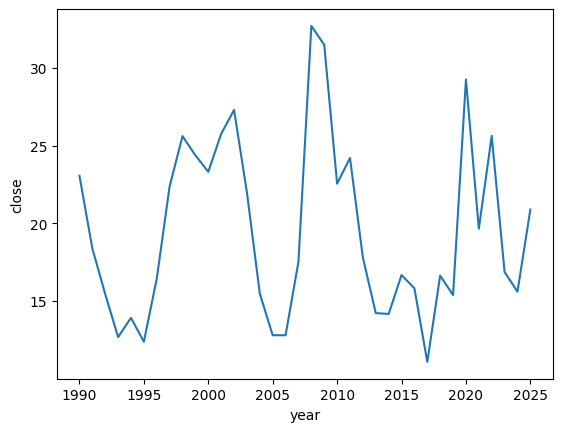

In [11]:
_ = sns.lineplot(x=vix_annual.index, y=vix_annual)

In [12]:
vix["month_year"] = vix['date'].dt.to_period('M')
vix_monthly = vix.groupby('month_year')["close"].mean()

C:\Users\ivan\AppData\Local\Temp\ipykernel_20940\971685479.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  vix["month_year"] = vix['date'].dt.to_period('M')


In [13]:
vix_monthly.head()

month_year
1990-01    23.347273
1990-02    23.262632
1990-03    20.062273
1990-04    21.403500
1990-05    18.097727
Freq: M, Name: close, dtype: float64

In [14]:
vix_monthly.index

PeriodIndex(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
             '1990-07', '1990-08', '1990-09', '1990-10',
             ...
             '2024-10', '2024-11', '2024-12', '2025-01', '2025-02', '2025-03',
             '2025-04', '2025-05', '2025-06', '2025-07'],
            dtype='period[M]', name='month_year', length=427)

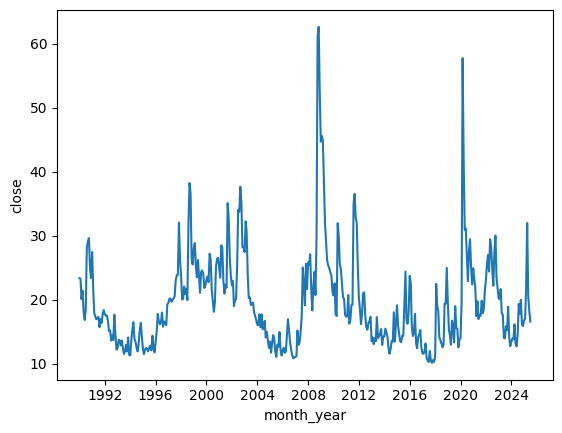

In [15]:
_ = sns.lineplot(x=vix_monthly.index.to_timestamp(), y=vix_monthly)

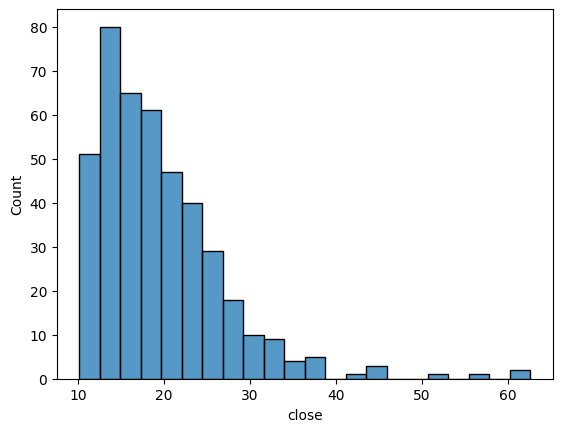

In [16]:
_ = sns.histplot(vix_monthly)

In [17]:
vix["week_year"] = vix['date'].dt.to_period('W')
vix_weekly = vix.groupby('week_year')["close"].mean()

C:\Users\ivan\AppData\Local\Temp\ipykernel_20940\4213936723.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  vix["week_year"] = vix['date'].dt.to_period('W')


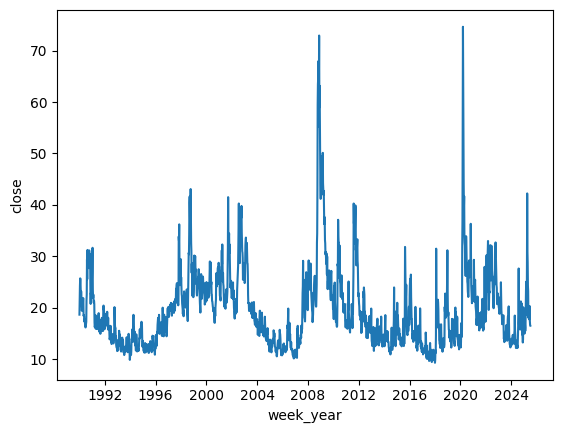

In [18]:
_ = sns.lineplot(x=vix_weekly.index.to_timestamp(), y=vix_weekly)

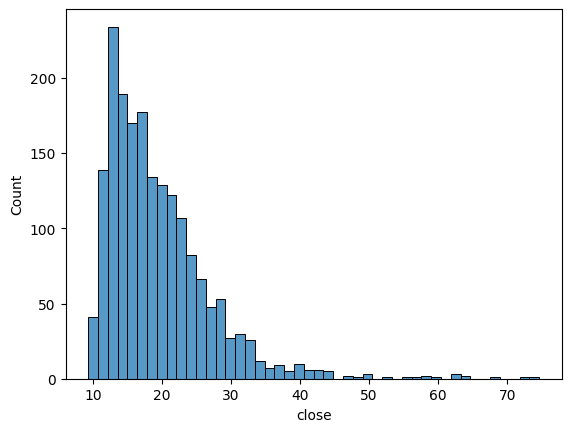

In [19]:
_ = sns.histplot(vix_weekly)

In [20]:
vix_monthly.describe()

count    427.000000
mean      19.490431
std        7.451077
min       10.125455
25%       14.079048
50%       17.687391
75%       23.112644
max       62.639473
Name: close, dtype: float64

In [21]:
vix_weekly.describe()

count    1854.000000
mean       19.481312
std         7.693650
min         9.340000
25%        13.934500
50%        17.668250
75%        22.693125
max        74.618001
Name: close, dtype: float64

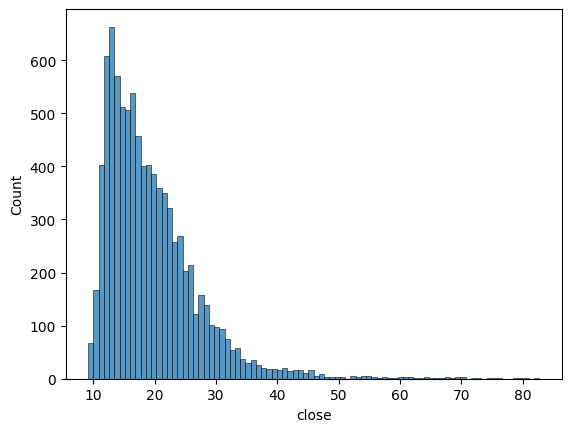

In [22]:
_ = sns.histplot(vix['close'])

In [23]:
vix['close'].describe()

count    8947.000000
mean       19.490267
std         7.826481
min         9.140000
25%        13.880000
50%        17.660000
75%        22.809999
max        82.690002
Name: close, dtype: float64

In [24]:
stats.percentileofscore(vix_weekly, 30)

np.float64(92.01725997842503)

In [31]:
100 - stats.percentileofscore(vix_weekly, 20)

np.float64(37.91801510248112)

In [25]:
vix.head()

,date,close,year,month_year,week_year
0,1990-01-02 00:00:00-06:00,17.240000,1990,1990-01,1990-01-01/1990-01-07
1,1990-01-03 00:00:00-06:00,18.190001,1990,1990-01,1990-01-01/1990-01-07
2,1990-01-04 00:00:00-06:00,19.219999,1990,1990-01,1990-01-01/1990-01-07
3,1990-01-05 00:00:00-06:00,20.110001,1990,1990-01,1990-01-01/1990-01-07
4,1990-01-08 00:00:00-06:00,20.260000,1990,1990-01,1990-01-08/1990-01-14


In [26]:
vix.to_csv("data/vix.csv")

In [35]:
start_date = "1998-12-31"
end_date = "2024-12-31"

In [33]:
high_volatility = pd.DataFrame({"date": vix_weekly.index, "vix": vix_weekly})

In [36]:
high_volatility = high_volatility[(high_volatility["date"] >= start_date) &
                                  (high_volatility["date"] <= end_date)]

In [39]:
high_volatility = high_volatility.reset_index(drop=True)

In [40]:
high_volatility.head()

,date,vix
0,1998-12-28/1999-01-03,23.3600
1,1999-01-04/1999-01-10,24.3240
2,1999-01-11/1999-01-17,29.1780
3,1999-01-18/1999-01-24,30.1775
4,1999-01-25/1999-01-31,28.8900


In [44]:
high_volatility["volatile"] = high_volatility["vix"] >= 20

In [45]:
high_volatility

,date,vix,volatile
0,1998-12-28/1999-01-03,23.3600,True
1,1999-01-04/1999-01-10,24.3240,True
2,1999-01-11/1999-01-17,29.1780,True
3,1999-01-18/1999-01-24,30.1775,True
4,1999-01-25/1999-01-31,28.8900,True
...,...,...,...
1353,2024-12-02/2024-12-08,13.2800,False
1354,2024-12-09/2024-12-15,13.9360,False
1355,2024-12-16/2024-12-22,20.1260,True
1356,2024-12-23/2024-12-29,15.4325,False


In [ ]:
_ = sns.lineplot(data=high_volatility, )